# Shots

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Shooting Skill

In [3]:
df = pd.read_csv("../data/understat/2021-22/shots.csv")
player = 'Mohamed Salah'
xg = df.loc[(df.player == player) & (df.season >= 2017)]
xg = xg.reset_index()

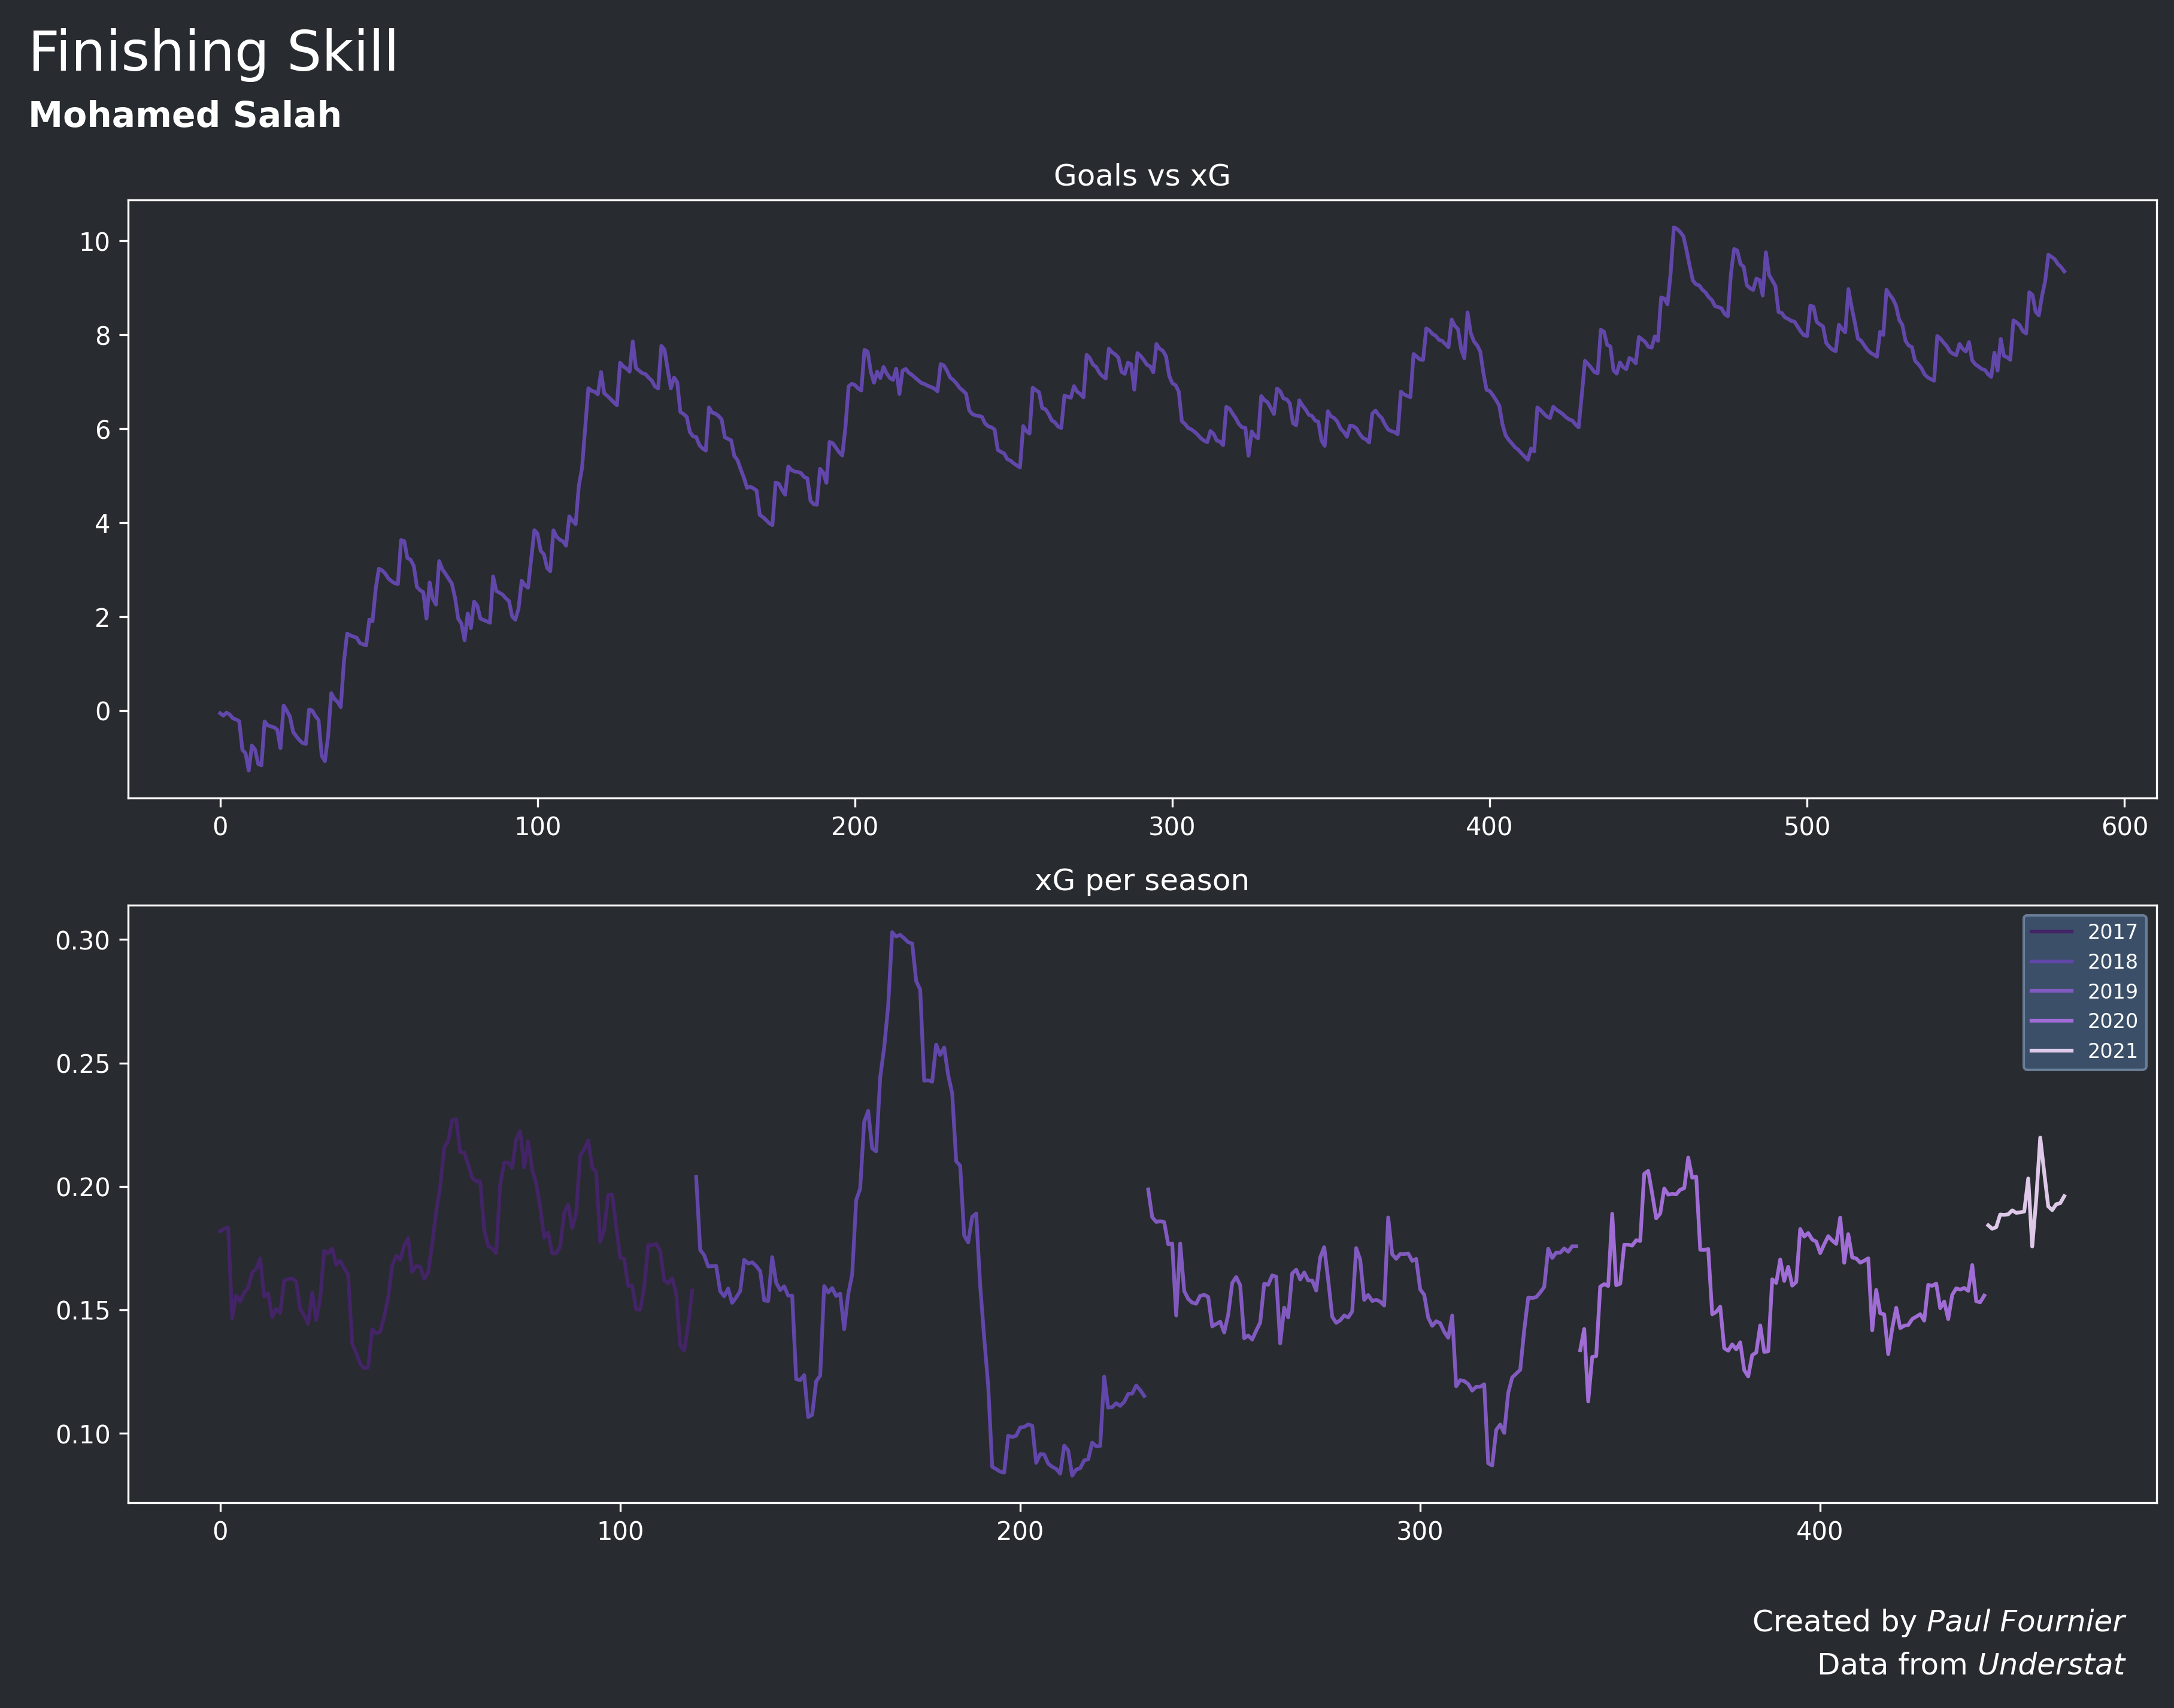

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)

# Difference between xG and Goals
axs[0].plot(
    np.cumsum(xg.result == 'Goal') - np.cumsum(xg.xG),
    color='#6247aa')
axs[0].title.set_text('Goals vs xG')

# xG per season
ma = np.convolve(
    xg.loc[xg.season == 2017].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(0, len(ma)),
    ma,
    color='#432466')
last = len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2018].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#6247aa')
last += len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2019].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#815ac0')
last += len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2020].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#a06cd5')
last += len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2021].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#dec9e9')

legend = axs[1].legend(
    prop={'size': 8},
    labels=['2017', '2018', '2019', '2020', '2021'],
    frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('#415A77')
frame.set_edgecolor('#778DA9')
axs[1].title.set_text('xG per season')

fig_text(
    x=0., y=1.075,
    s=f"Finishing Skill",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0., y=1.025,
    s=f"{player}",
    fontweight="bold",
    fontsize=14, fontfamily=title_font,color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)
fig_text(
    x=0.83, y=-0.055,
    s="Data from <Understat>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)


plt.tight_layout()
plt.show()

# Shooting Location

In [5]:
from mplsoccer import VerticalPitch
from matplotlib.colors import LinearSegmentedColormap

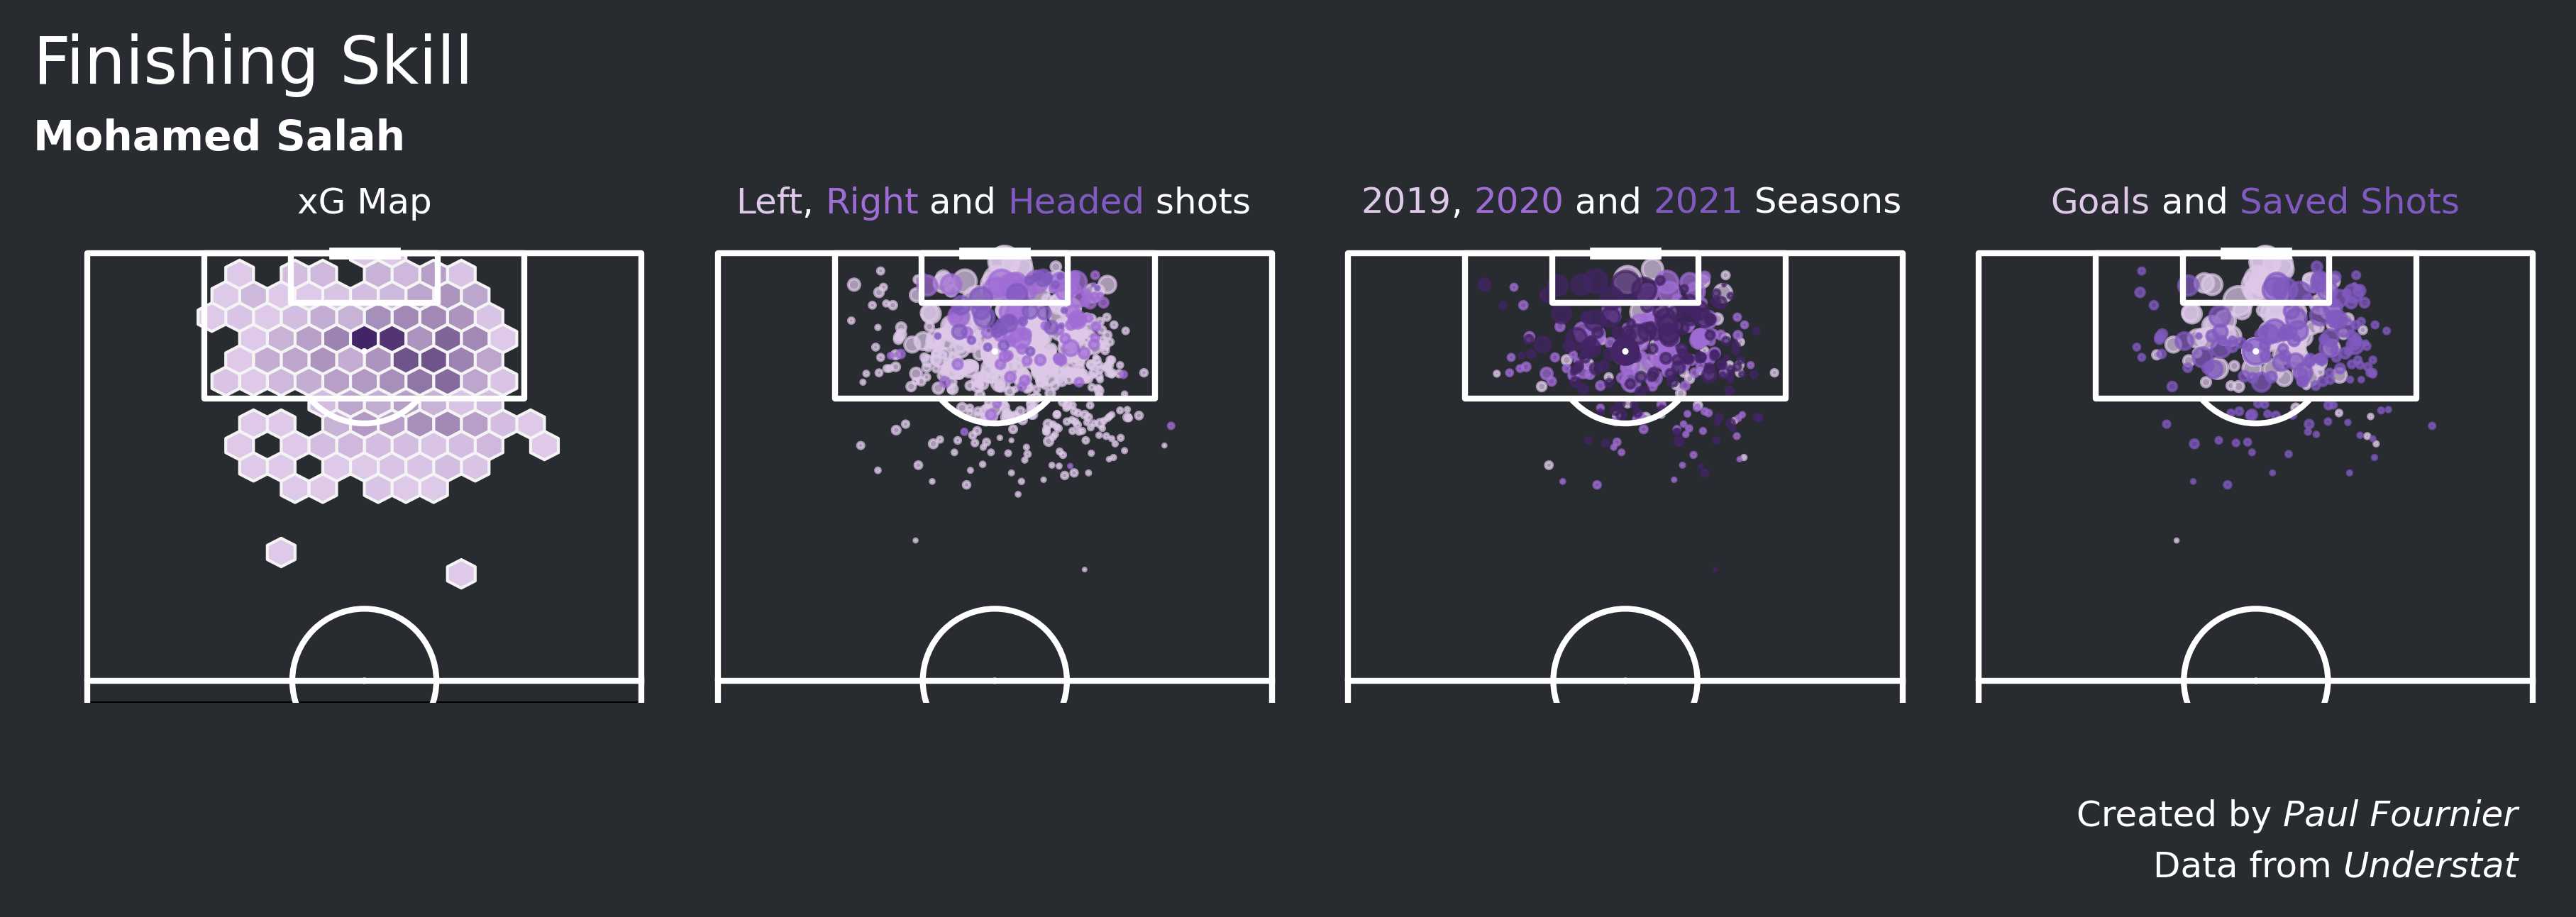

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(12, 8))
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)
axs[2].patch.set_alpha(0)
axs[3].patch.set_alpha(0)

pitch = VerticalPitch(
    pitch_type='opta',
    line_color='#FFFFFF',
    half=True,
    line_zorder=5,
    pitch_color=background,
)
pitch.draw(ax=axs[0])
pitch.draw(ax=axs[1])
pitch.draw(ax=axs[2])
pitch.draw(ax=axs[3])

cmap_100 = LinearSegmentedColormap.from_list(
    "Pearl Earring - 100 colors",
    ['#dec9e9', '#432466'],
    N=100)

pitch.hexbin(
    xg.X*100, xg.Y*100,
    ax=axs[0],
    edgecolors='#f4f4f4', gridsize=(20, 20), cmap=cmap_100)
axs[0].title.set_text('xG Map')

pitch.scatter(
    xg.loc[xg.shotType == 'LeftFoot'].X*100,
    xg.loc[xg.shotType == 'LeftFoot'].Y*100,
    s=xg.loc[xg.shotType == 'LeftFoot'].xG*100,
    c='#dec9e9', alpha=.7, ax=axs[1])
pitch.scatter(
    xg.loc[xg.shotType == 'RightFoot'].X*100,
    xg.loc[xg.shotType == 'RightFoot'].Y*100,
    s=xg.loc[xg.shotType == 'RightFoot'].xG*100,
    c='#a06cd5', alpha=.7, ax=axs[1])
pitch.scatter(
    xg.loc[xg.shotType == 'Head'].X*100,
    xg.loc[xg.shotType == 'Head'].Y*100,
    s=xg.loc[xg.shotType == 'Head'].xG*100,
    c='#815ac0', alpha=.7, ax=axs[1])
fig_text(
    x=0.275, y=0.665,
    s="<Left>, <Right> and <Headed> shots",
    highlight_textprops=[
        {"color": '#dec9e9'},
        {"color": '#a06cd5'},
        {"color": '#815ac0'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

pitch.scatter(
    xg.loc[xg.season == 2021].X*100,
    xg.loc[xg.season == 2021].Y*100,
    s=xg.loc[xg.season == 2021].xG*100,
    c='#dec9e9', alpha=.7, ax=axs[2])
pitch.scatter(
    xg.loc[xg.season == 2020].X*100,
    xg.loc[xg.season == 2020].Y*100,
    s=xg.loc[xg.season == 2020].xG*100,
    c='#a06cd5', alpha=.7, ax=axs[2])
pitch.scatter(
    xg.loc[xg.season == 2019].X*100,
    xg.loc[xg.season == 2019].Y*100,
    s=xg.loc[xg.season == 2019].xG*100,
    c='#432466', alpha=.7, ax=axs[2])
fig_text(
    x=0.52, y=0.665,
    s="<2019>, <2020> and <2021> Seasons",
    highlight_textprops=[
        {"color": '#dec9e9'},
        {"color": '#a06cd5'},
        {"color": '#815ac0'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

pitch.scatter(
    xg.loc[xg.result == "Goal"].X*100,
    xg.loc[xg.result == "Goal"].Y*100,
    s=xg.loc[xg.result == "Goal"].xG*100,
    c='#dec9e9', alpha=.7, ax=axs[3])
pitch.scatter(
    xg.loc[xg.result == "SavedShot"].X*100,
    xg.loc[xg.result == "SavedShot"].Y*100,
    s=xg.loc[xg.result == "SavedShot"].xG*100,
    c='#815ac0', alpha=.7, ax=axs[3])
fig_text(
    x=0.79, y=0.665,
    s="<Goals> and <Saved Shots>",
    highlight_textprops=[
        {"color": '#dec9e9'},
        {"color": '#815ac0'},
        ],
    fontsize=12, fontfamily=title_font,
    color=text_color, alpha=1)

fig_text(
    x=0., y=0.755,
    s=f"Finishing Skill",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0., y=0.705,
    s=f"{player}",
    fontweight="bold",
    fontsize=14, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    0.8, 0.305,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)
fig_text(
    0.83, 0.275,
    s="Data from <Understat>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()

# xG Unchained

[Reference: Nicolas P. Rougier](https://matplotlib.org/stable/gallery/animation/unchained.html#sphx-glr-gallery-animation-unchained-py)

In [7]:
x_bins = 35
y_bins = 25
x_min = 0.65
X = np.linspace(-1, 1, y_bins)
season = 2020

def get_data(season = 2017):
    data = np.zeros((y_bins, x_bins))

    for i in range(y_bins):
        for j in range(x_bins):
            # Count instances where the shot was taken at each (rounded coordinate)
            data[i, x_bins - 1 - j] = xg.loc[
                (xg.X.round(2) > x_min + ((1 - x_min) / x_bins) * j) &
                (xg.X.round(2) <= x_min + ((1 - x_min) / x_bins) * (j + 1)) & 
                (xg.Y.round(2) > (1 / y_bins) * i) &
                (xg.Y.round(2) <= (1 / y_bins) * (i + 1)) &
                (xg.season == season)
                ].shape[0]

    # Scale
    return data / 2

data = get_data(season)

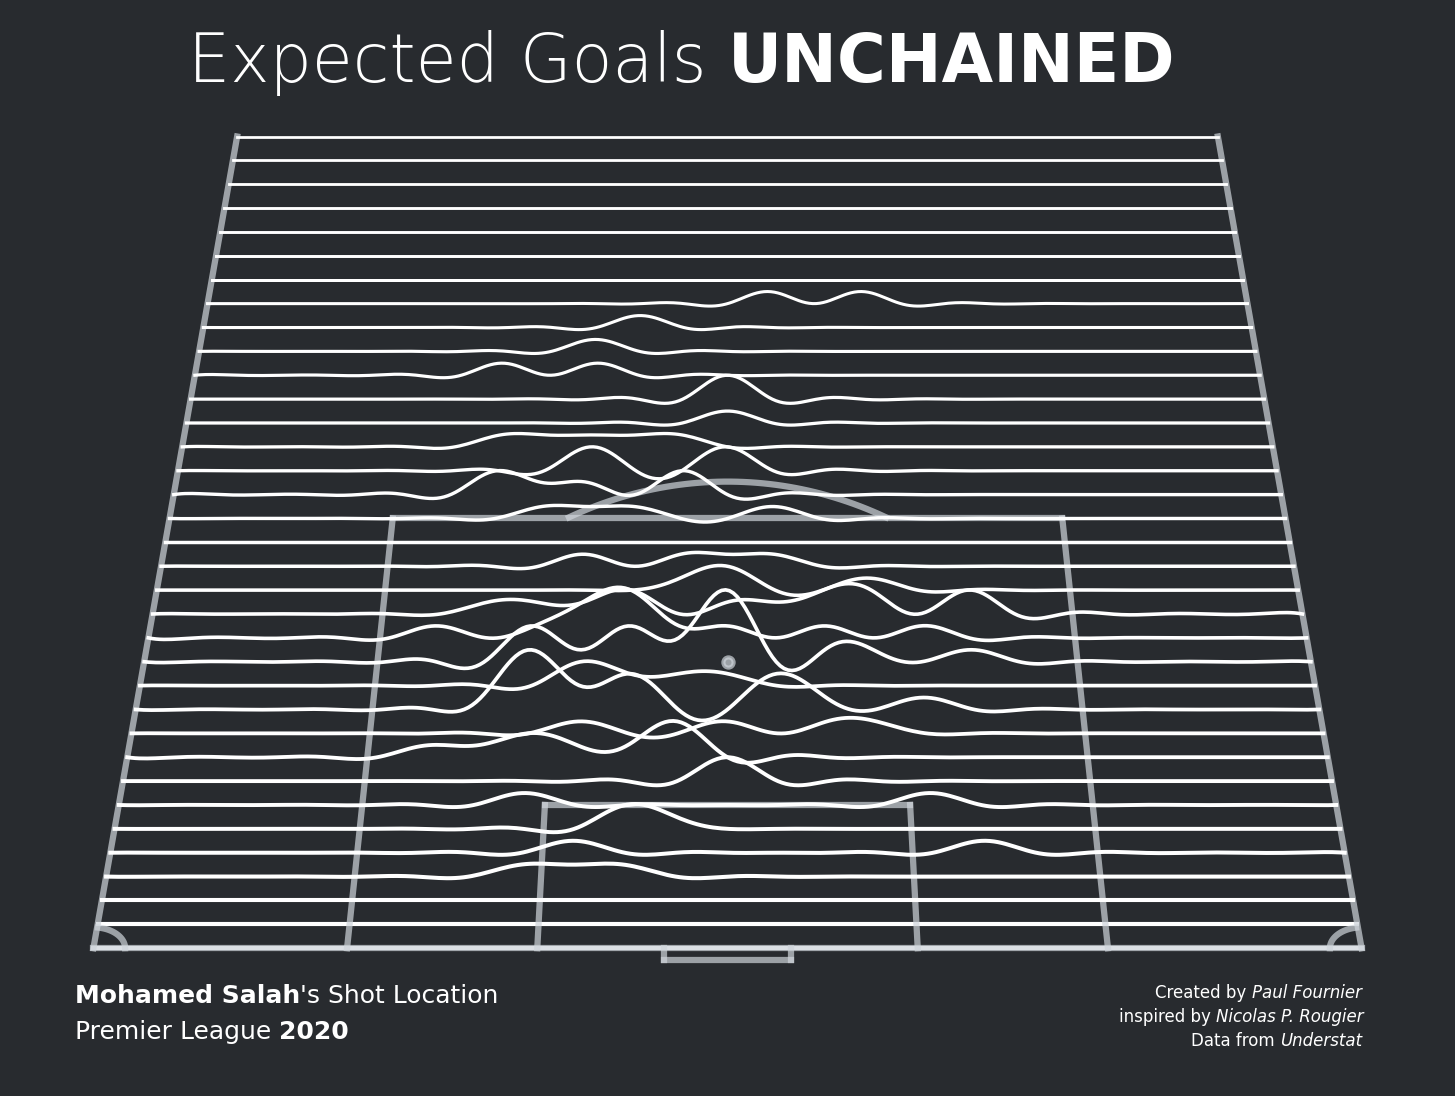

In [8]:
from scipy.interpolate import make_interp_spline, BSpline

fig, ax = plt.subplots()
fig.set_facecolor(background)
ax.patch.set_alpha(0)

# Small reduction of the X extents to get a cheap perspective effect
perspective = lambda i : 1 - i / 150.

## Draw Pitch
line_color = "#ced4da"
line_alpha = .7
# Side lines
ax.plot(
    np.linspace(-1, 1),
    np.repeat(0, 50),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    np.linspace(-1, np.min(perspective(x_bins-1) * np.linspace(-1, 1))),
    np.linspace(0, x_bins-1),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    np.linspace(1, np.max(perspective(x_bins-1) * np.linspace(-1, 1))),
    np.linspace(0, x_bins-1),
    color=line_color,
    alpha=line_alpha
    )
# 6 yard line
i = 6
ax.plot(
    perspective(i) * np.linspace(-.3, .3),
    np.repeat(i, 50),
    color=line_color,
    alpha=line_alpha
    )
# 6 yard side box line
ax.plot(
    np.linspace(-.3, np.min(perspective(i) * np.linspace(-.3, .3))),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    np.linspace(.3, np.max(perspective(i) * np.linspace(-.3, .3))),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
# Penalty box line
i = 18
ax.plot(
    perspective(i) * np.linspace(-.6, .6),
    np.repeat(i, 50),
    color=line_color,
    alpha=.7
    )
# Penalty side box line
ax.plot(
    np.linspace(-.6, np.min(perspective(i) * np.linspace(-.6, .6))),
    np.linspace(0, i),
    color=line_color,
    alpha=.7
    )
ax.plot(
    np.linspace(.6, np.max(perspective(i) * np.linspace(-.6, .6))),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
# Penalty outer circle
x_range = np.linspace(-.25, .25)
ax.plot(
    x_range,
    np.sqrt(-(x_range*30)**2. + 382), 
    color=line_color,
    alpha=line_alpha
    )
# Penalty spot
ax.scatter(
    0, 12,
    color=line_color,
    s=6,
    alpha=line_alpha
    )
# Corner Flag
r = .05
theta_l = np.linspace(0, np.pi/2.2)
ax.plot(
    r*np.cos(theta_l)-1,
    r*np.sin(theta_l)*(35/2),
    color=line_color,
    alpha=line_alpha
    )
theta_r = np.linspace(np.pi/1.8, np.pi)
ax.plot(
    r*np.cos(theta_r)+1,
    r*np.sin(theta_r)*(35/2),
    color=line_color,
    alpha=line_alpha
    )
# Goal
i = -0.5
ax.plot(
    perspective(i) * np.linspace(-.1, .1),
    np.repeat(i, 50),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    perspective(i) * np.linspace(0.1, .1),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    perspective(i) * np.linspace(-0.1, -.1),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )

lines = []
for i in range(x_bins):
    ## RAW
    # line, = ax.plot(
    #     perspective(i) * X,
    #     i + data.T[i],
    #     color='w',
    #     lw=1. - i/100.0)

    ## SPLINE
    xnew = np.linspace(X.min(), X.max(),  300)
    spl = make_interp_spline(X, data.T[i], k=5) # type: BSpline
    power_smooth = spl(xnew)

    line, = ax.plot(
        perspective(i) * xnew,
        i + power_smooth,
        color="w",
        lw=1.-i/100.0,
        zorder=i)
    lines.append(line)

# No ticks
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])

ax.text(
    0.5, 1.0,
    "Expected Goals ",
    transform=ax.transAxes,
    ha="right", va="bottom",
    family="sans-serif",
    fontweight="light", fontsize=16)
ax.text(
    0.5, 1.0,
    "UNCHAINED",
    transform=ax.transAxes,
    ha="left", va="bottom",
    family="sans-serif",
    fontweight="bold", fontsize=16)

fig_text(
    0.15, .14,
    s=f"<{player}>'s Shot Location",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)
fig_text(
    0.15, .11,
    s=f"Premier League <{season}>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)
fig_text(
    0.75, .14,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=4, fontfamily=watermark_font, color=text_color)
fig_text(
    0.73, .12,
    s="inspired by <Nicolas P. Rougier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=4, fontfamily=watermark_font, color=text_color)
fig_text(
    0.77, .1,
    s="Data from <Understat>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=4, fontfamily=watermark_font, color=text_color)

plt.show()

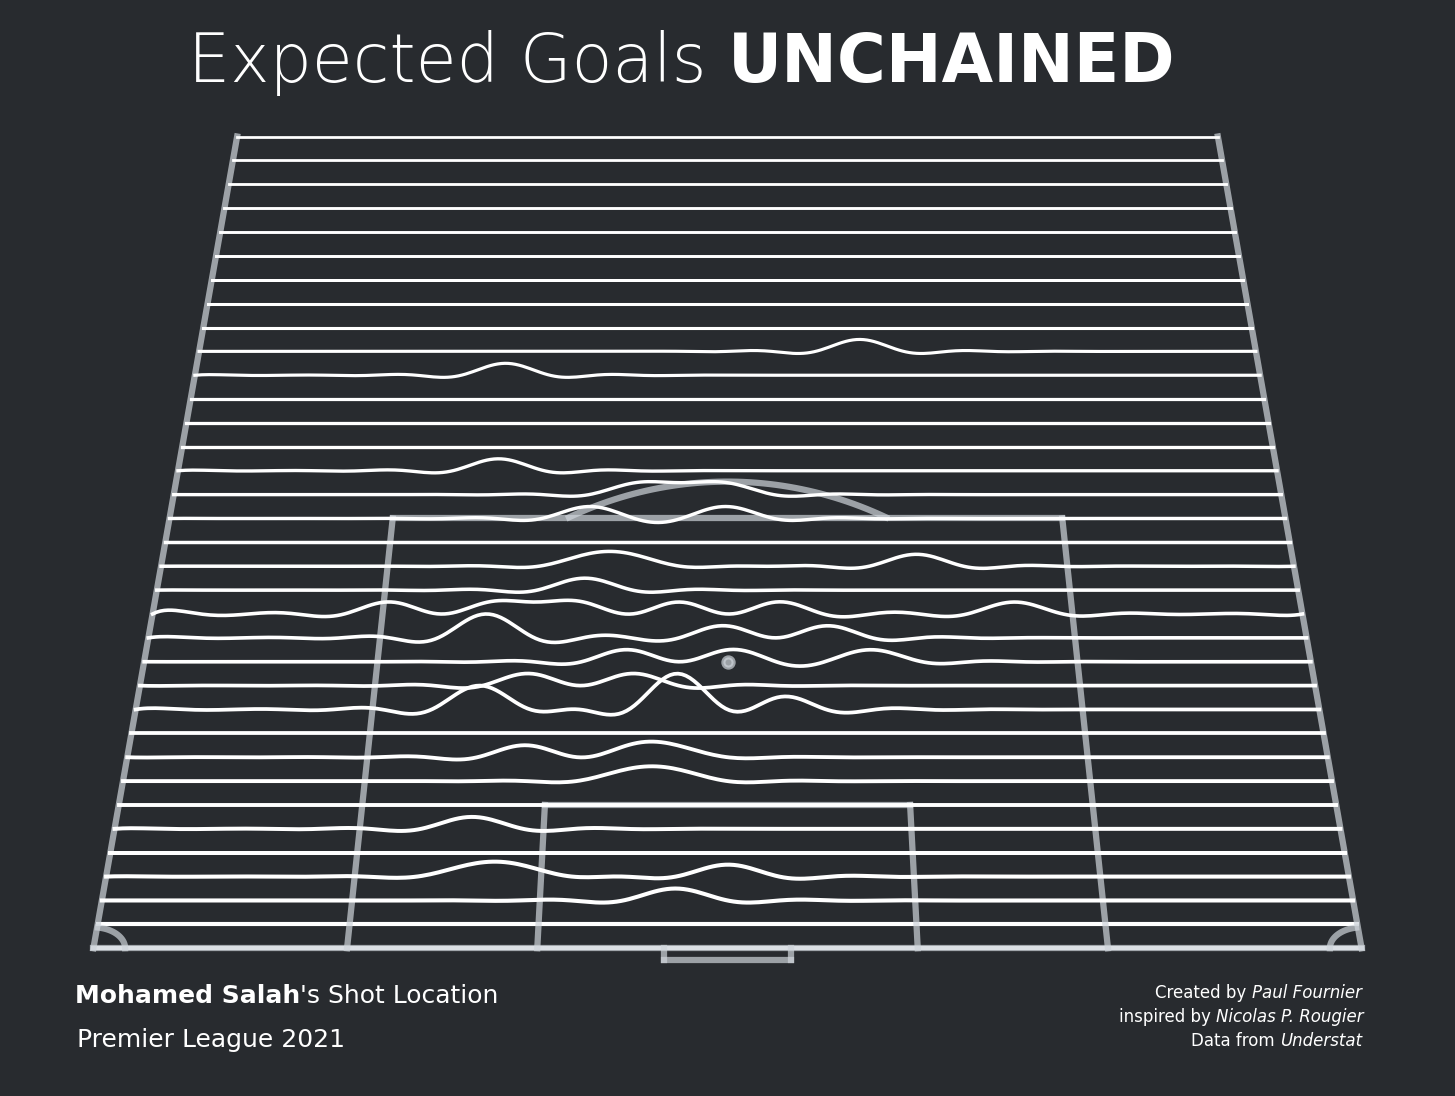

In [9]:
import matplotlib.animation as animation

season = 2014
data = get_data(season)

fig, ax = plt.subplots()
fig.set_facecolor(background)
ax.patch.set_alpha(0)

# Small reduction of the X extents to get a cheap perspective effect
perspective = lambda i : 1 - i / 150.

## Draw Pitch
line_color = "#ced4da"
line_alpha = .7
# Side lines
ax.plot(
    np.linspace(-1, 1),
    np.repeat(0, 50),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    np.linspace(-1, np.min(perspective(x_bins-1) * np.linspace(-1, 1))),
    np.linspace(0, x_bins-1),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    np.linspace(1, np.max(perspective(x_bins-1) * np.linspace(-1, 1))),
    np.linspace(0, x_bins-1),
    color=line_color,
    alpha=line_alpha
    )
# 6 yard line
i = 6
ax.plot(
    perspective(i) * np.linspace(-.3, .3),
    np.repeat(i, 50),
    color=line_color,
    alpha=line_alpha
    )
# 6 yard side box line
ax.plot(
    np.linspace(-.3, np.min(perspective(i) * np.linspace(-.3, .3))),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    np.linspace(.3, np.max(perspective(i) * np.linspace(-.3, .3))),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
# Penalty box line
i = 18
ax.plot(
    perspective(i) * np.linspace(-.6, .6),
    np.repeat(i, 50),
    color=line_color,
    alpha=.7
    )
# Penalty side box line
ax.plot(
    np.linspace(-.6, np.min(perspective(i) * np.linspace(-.6, .6))),
    np.linspace(0, i),
    color=line_color,
    alpha=.7
    )
ax.plot(
    np.linspace(.6, np.max(perspective(i) * np.linspace(-.6, .6))),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
# Penalty outer circle
x_range = np.linspace(-.25, .25)
ax.plot(
    x_range,
    np.sqrt(-(x_range*30)**2. + 382), 
    color=line_color,
    alpha=line_alpha
    )
# Penalty spot
ax.scatter(
    0, 12,
    color=line_color,
    s=6,
    alpha=line_alpha
    )
# Corner Flag
r = .05
theta_l = np.linspace(0, np.pi/2.2)
ax.plot(
    r*np.cos(theta_l)-1,
    r*np.sin(theta_l)*(35/2),
    color=line_color,
    alpha=line_alpha
    )
theta_r = np.linspace(np.pi/1.8, np.pi)
ax.plot(
    r*np.cos(theta_r)+1,
    r*np.sin(theta_r)*(35/2),
    color=line_color,
    alpha=line_alpha
    )
# Goal
i = -0.5
ax.plot(
    perspective(i) * np.linspace(-.1, .1),
    np.repeat(i, 50),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    perspective(i) * np.linspace(0.1, .1),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )
ax.plot(
    perspective(i) * np.linspace(-0.1, -.1),
    np.linspace(0, i),
    color=line_color,
    alpha=line_alpha
    )

lines = []
for i in range(x_bins):
    ## RAW
    # line, = ax.plot(
    #     perspective(i) * X,
    #     i + data.T[i],
    #     color='w',
    #     lw=1. - i/100.0)

    ## SPLINE
    xnew = np.linspace(X.min(), X.max(),  300)
    spl = make_interp_spline(X, data.T[i], k=5) # type: BSpline
    power_smooth = spl(xnew)

    line, = ax.plot(
        perspective(i) * xnew,
        i + power_smooth,
        color="w",
        lw=1.-i/100.0,
        zorder=i)
    lines.append(line)

# No ticks
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])

ax.text(
    0.5, 1.0,
    "Expected Goals ",
    transform=ax.transAxes,
    ha="right", va="bottom",
    family="sans-serif",
    fontweight="light", fontsize=16)
ax.text(
    0.5, 1.0,
    "UNCHAINED",
    transform=ax.transAxes,
    ha="left", va="bottom",
    family="sans-serif",
    fontweight="bold", fontsize=16)

fig_text(
    0.15, .14,
    s=f"<{player}>'s Shot Location",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)
sub = ax.text(
    0.13, -.05,
    f"Premier League {season}",
    transform=ax.transAxes, ha="center",
    fontsize=6)

fig_text(
    0.75, .14,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=4, fontfamily=watermark_font, color=text_color)
fig_text(
    0.73, .12,
    s="inspired by <Nicolas P. Rougier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=4, fontfamily=watermark_font, color=text_color)
fig_text(
    0.77, .1,
    s="Data from <Understat>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=4, fontfamily=watermark_font, color=text_color)

def update(*args):
    global season

    season += 1
    data = get_data(season)

    # Update data
    for i in range(x_bins):
        ## RAW
        # lines[i].set_ydata(i + data.T[i])

        ## SPLINE
        xnew = np.linspace(X.min(), X.max(),  300)
        spl = make_interp_spline(X, data.T[i], k=5) # type: BSpline
        power_smooth = spl(xnew)

        lines[i].set_ydata(i + power_smooth)

    sub.set_text(f"Premier League {season}")

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(
    fig, update,
    interval=1000, save_count=5, blit=True)

writergif = animation.PillowWriter()
anim.save('../data/understat/unchained.gif', writer=writergif)